
# TASK 1 : Import Libraries

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


# TASK 2 : Clone & Explore dataset

In [ ]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

fatal: destination path 'datasets' already exists and is not an empty directory.


In [ ]:
#set the path to the main dir
import os 
main_dir = "/content/datasets/Data"

#set the path to the train dir
train_dir = os.path.join(main_dir, 'train')

#set the path to the test dir
test_dir = os.path.join(main_dir, 'test')

#directory with the training covid images
train_covid_dir = os.path.join(train_dir, 'COVID19')

#directory with the training normal images
train_normal_dir = os.path.join(train_dir, 'NORMAL')

#directory with the testing covid images
test_covid_dir = os.path.join(test_dir, 'COVID19')

#directory with the testing normal images
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [ ]:
#print the filename
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])




['COVID19(89).jpg', 'COVID19(443).jpg', 'COVID19(233).jpg', 'COVID19(202).jpg', 'COVID-19 (5).jpg', 'COVID-19 (11).jpg', 'COVID19(533).jpg', 'COVID-19 (192).jpg', 'COVID-19 (6).jpg', 'COVID19(19).jpg']
['NORMAL(531).jpg', 'NORMAL(78).jpg', 'NORMAL(896).jpg', 'NORMAL(221).jpg', 'NORMAL(1091).jpg', 'NORMAL(1491).jpg', 'NORMAL(1031).jpg', 'NORMAL(436).jpg', 'NORMAL(1478).jpg', 'NORMAL(776).jpg']
['COVID19(198).jpg', 'COVID-19 (425).jpg', 'COVID19(210).jpg', 'COVID-19 (479).jpg', 'COVID-19 (522).jpg', 'COVID19(182).jpg', 'COVID-19 (609).jpg', 'COVID-19 (745).jpg', 'COVID19(561).jpg', 'COVID19(383).jpg']
['NORMAL(613).jpg', 'NORMAL(551).jpg', 'NORMAL(1579).jpg', 'NORMAL(248).jpg', 'NORMAL(86).jpg', 'NORMAL(237).jpg', 'NORMAL(1402).jpg', 'NORMAL(1065).jpg', 'NORMAL(477).jpg', 'NORMAL(1283).jpg']


In [ ]:
#print the total no of images present in each dir
print("total images present in the trainnig set :", len(train_covid_names + train_normal_names))
print("total images present in the testing set :", len(test_covid_names + test_normal_names))


total images present in the trainnig set : 1811
total images present in the testing set : 484


# TASK 3 : Data Visualization

['/content/datasets/Data/train/COVID19/COVID19(89).jpg', '/content/datasets/Data/train/COVID19/COVID19(443).jpg', '/content/datasets/Data/train/COVID19/COVID19(233).jpg', '/content/datasets/Data/train/COVID19/COVID19(202).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (5).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (11).jpg', '/content/datasets/Data/train/COVID19/COVID19(533).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (192).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(531).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(78).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(896).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(221).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1091).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1491).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1031).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(436).jpg']


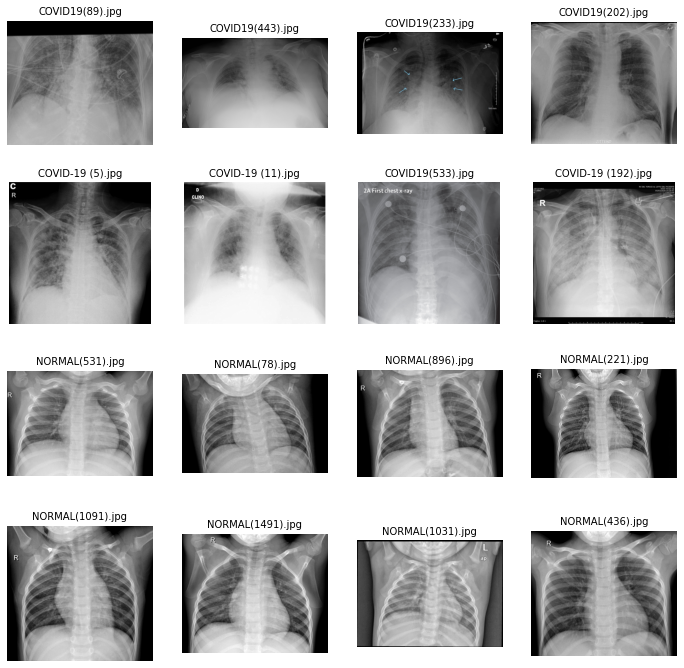

In [ ]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg

#set the number of columns and rows
rows = 4
cols = 4

#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)

#get the filenames from the covid & normal dir of the train dataset
covid_pic = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_pic = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]

#print the list
print(covid_pic)
print(normal_pic)

#merge the covid and normal list
merged_list = covid_pic + normal_pic
for i, img_path in enumerate(merged_list):
  data = img_path.split('/', 6)[6]
  sp = plt.subplot(rows, cols, i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize = 10 )
  plt.imshow(img, cmap = 'gray')

plt.show()

# TASK 4 : Data Preprocessing & Augmentation

In [ ]:
# generate training,testing and validation batches 
dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2, 
                                zoom_range = 0.2,
                                horizontal_flip = True)

dgen_validation = ImageDataGenerator(rescale = 1./255)
dgen_test = ImageDataGenerator(rescale = 1./255)

train_generator = dgen_train.flow_from_directory(train_dir, 
                                                 target_size = (150, 150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')
validation_generator = dgen_train.flow_from_directory(train_dir, 
                                                 target_size = (150, 150),
                                                 subset = 'validation',
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_generator = dgen_test.flow_from_directory(test_dir, 
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')





Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

# TASK 5 : Build Convolutional Neural Network Model

In [ ]:
model = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32,(5,5), padding = 'SAME', activation='relu',input_shape = (150, 150, 3)))
#'relu- non linearity

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64, (5, 5), padding = 'SAME', activation= 'relu'))
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# Flatten layer
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256, activation= 'relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(256, activation= 'sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 87616)            

# TASK 6 : Compile & Train the Model

In [ ]:
#compile the model
model.compile(Adam(lr = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#train the model
history = model.fit(train_generator,
                    epochs =30,
                    validation_data = validation_generator)

Epoch 1/30


ValueError: ignored

# TASK 7 : Performance Evaluation

In [ ]:
#get the keys of history object
history.history.keys()

In [ ]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation loses')
plt.xlabel('epoch')

In [ ]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')

In [ ]:
# get the test acuarcy and loss
test_loss, test_acc = model.evaluate(test_generator)
print('test loss:{} test acc:{}'.format(test_loss, test_acc))

# TASK 8 : Prediction On New Data

In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for filename in uploaded.keys():
  img_path = '/content/'+filename
  img = image.load_img(img_path, target.size(150,150))
  iages = image.img_to_array(img)
  images = np.expand_dims(image, axis = 0)
  prediction = model.predict(images)
  print(filename)

  if prediction == 0: 
     print('covid detected')
  else:
     print('Your report is normal')